### Import libs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import math
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Import data

In [3]:
rand_state = 1000

In [4]:
df_delta = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_delta_clean.xlsx')

In [5]:
df_delta = df_delta.set_index(['date'])

### Scaling the features

In [6]:
#saving a copy of y_test for calculating the metrics and plotting
y_test_orig = df_delta['pax_count'][163:]

In [7]:
scale = StandardScaler()
df_sc = scale.fit_transform(df_delta)
df_sc = pd.DataFrame(df_sc, columns=df_delta.columns)

In [8]:
df_sc.head()

,pax_count,revenue,seat_miles,load_factor,flights
0,-0.965913,-1.345734,-1.040108,-2.997431,-0.001256
1,-1.134626,-1.523190,-1.396872,-2.440074,-0.352234
2,-0.740600,-1.221050,-1.095114,-1.822257,-0.061042
3,-1.012825,-1.427524,-1.305279,-2.203905,-0.324286
4,-0.925675,-1.321139,-1.313406,-1.315912,-0.307314


### Defining the variables and splitting the data

In [9]:
y = df_sc['pax_count']
X = df_sc.drop('pax_count', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state, shuffle=False)

###  Fit the model

In [10]:
SVM_regression = SVR()
SVM_regression.fit(X_train, y_train)

SVR()

### Make a prediction 

In [11]:
test_pred = SVM_regression.predict(X_test)

In [12]:
predictions = pd.DataFrame({ 'y_test':y_test,'y_pred':test_pred})
predictions.head()

,y_test,y_pred
163,1.274358,1.261967
164,0.873087,0.953470
165,1.084654,1.026417
166,0.821827,0.669408
167,0.826826,0.818644


---

#    *Grid Search*

---

### Defining the hyperparameters 

In [13]:
my_param_grid = {'C': [1,10,100], 'gamma': [1,0.1,0.01], 'kernel': ['rbf']} 

In [14]:
GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=3, cv=5 )

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [15]:
grid = GridSearchCV(estimator=SVR(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

### Fit the model with the optimized parameters

In [16]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=2)

In [17]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [18]:
grid.best_estimator_

SVR(C=100, gamma=0.1)

### Predict the optimized model

In [19]:
test_pred_optimized = grid.predict(X_test)

In [20]:
predictions['y_pred_optimized'] = test_pred_optimized
predictions.head()

,y_test,y_pred,y_pred_optimized
163,1.274358,1.261967,1.293641
164,0.873087,0.953470,1.007755
165,1.084654,1.026417,1.143185
166,0.821827,0.669408,0.838710
167,0.826826,0.818644,0.872495


---

#    *Plotting* with scatterplot

---

### Plot of the regular model

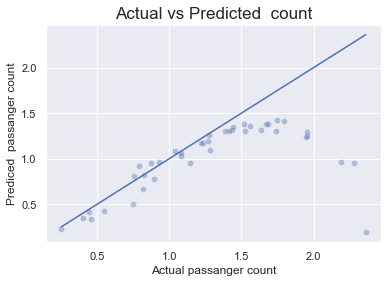

In [21]:
sns.scatterplot(x=y_test, y=test_pred, alpha=0.4)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual passanger count', fontsize=12)
plt.ylabel('Prediced  passanger count', fontsize=12)
plt.title('Actual vs Predicted  count', fontsize=17)
plt.show()

### Plot of the optimized model

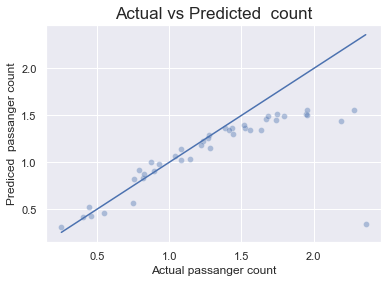

In [22]:
sns.scatterplot(x=y_test, y=test_pred_optimized, alpha=0.4)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual passanger count', fontsize=12)
plt.ylabel('Prediced  passanger count', fontsize=12)
plt.title('Actual vs Predicted  count', fontsize=17)
plt.show()

---

#    *Evaluation*

---

### 1) Regular model 

#### Invert scaling 

In [23]:
X_test.index = np.arange(0, len(X_test))

In [24]:
test_pred = pd.DataFrame(test_pred)

In [25]:
test_pred_df = test_pred.join(X_test)

In [26]:
scale_test_pred = pd.DataFrame(scale.inverse_transform(test_pred_df, copy=True))

In [27]:
test_pred_inv = scale_test_pred[0]

#### MAE and RMSE 

In [28]:
MAE = (round(mean_absolute_error(y_test_orig, test_pred_inv),2))
print("Test Score: %.2f MAE" % (MAE))

Test Score: 565773.35 MAE


In [29]:
RMSE = math.sqrt(mean_squared_error(y_test_orig, test_pred_inv))
print("Test Score: %.2f RMSE" % (RMSE))

Test Score: 1003794.32 RMSE


### 2) Optimized model

#### Invert scaling 

In [30]:
test_pred_optimized = pd.DataFrame(test_pred_optimized)

In [31]:
test_pred_opt_df = test_pred_optimized.join(X_test)

In [32]:
scale_test_pred_opt = pd.DataFrame(scale.inverse_transform(test_pred_opt_df, copy=True))

In [33]:
test_pred_opt_inv = scale_test_pred_opt[0]

#### MAE and RMSE 

In [34]:
MAE_opt = (round(mean_absolute_error(y_test_orig, test_pred_opt_inv),2))
print("Test Score: %.2f MAE" % (MAE_opt))

Test Score: 406758.17 MAE


In [35]:
RMSE_opt = math.sqrt(mean_squared_error(y_test_orig, test_pred_opt_inv))
print("Test Score: %.2f RMSE" % (RMSE_opt))

Test Score: 780787.45 RMSE


---

# *Plotting* 

TypeError: index type not supported

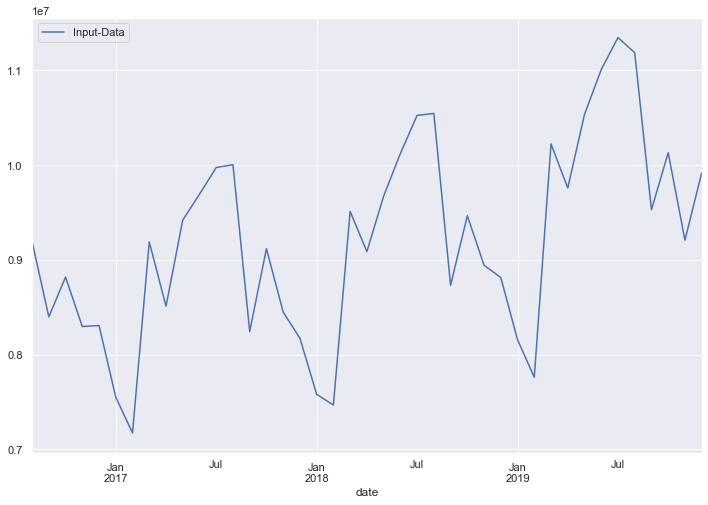

In [41]:
y_test_orig.plot(legend = True, label = 'Input-Data',figsize = (12,8))
#test_pred_inv.plot(legend = True, label = 'SVR')
test_pred_opt_inv.plot(legend = True, label = 'SVR_Optimized')

#    *Export Forecast*

---

In [76]:
%cd  /Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/Delta Airlines

[Errno 2] No such file or directory: '/Users/dilianaserafimova/Library/Mobile Documents/com~apple~CloudDocs/Documents/My Files/Master Studium/Masterarbeit/Forecast/Delta Airlines'
/Users/dilianaserafimova/Source Code/American_Airlines


In [77]:
test_pred_optimized.to_csv('predictions_svr_optimized.csv')

In [78]:
test_pred.to_csv('predictions_svr.csv')